## Equipo 2

#### Integrantes:
- Contreras Acosta Noel Alejandro
- Perez Alvarado Alfonso
- Rosales Peña Juan Pablo
- Vázquez Corrilo Harold

# Generación y uso de variables aleatorias

Daremos recopilación de métodos para generar variables aleatorias utilizados en simulación computacional. Se abordan distribuciones uniformes, exponenciales, normales, binomiales y Poisson, entre otras, así como técnicas como la transformada inversa y el método del rechazo.

Ejemplos comunes en simulación:
- Tiempo entre llegada de cada persona  
- Número de personas por minuto  
- Número de artículos por persona  
- Cantidad de dinero ganado cada hora  
- Tiempo de atención por cliente  
- Número de veces que la cajera solicita ayuda durante la jornada  
- Cantidad de gente que está formada  
- Número de personas que pagan con tarjeta

## Métodos de generación de números aleatorios rectangulares

La generación de variables aleatorias con esta distribución es importante porque las variables que tengan una distribución diferente, tendrán que usar a ésta como base.

- Cada posible resultado entre $a$ y $b$ tiene la misma probabilidad $1/n$.

Las variables generadas deben cumplir con:
- Los valores generados deben ser independientes y estar idénticamente distribuidos
- La secuencia generada debe ser lo más larga posible y ser reproducibles
- Debe permitir generar múltiples secuencias
- Que usen poca memoria

Históricamente se han usado cuatro tipos de métodos para generar sucesiones de números rectangulares:
- Métodos manuales
- Tablas de biblioteca
- Computación analógica
- Computación digital

### Generación pseudoaleatoria

La generación de los números aleatorios rectangulares debe realizarse a través de relaciones matemáticas de recurrencia. Por esta razón se consideran **pseudoaleatorios**, ya que el proceso para generarlos es determinístico.

Hay dos métodos que son los más utilizados para la generación. Ambos se basan en la siguiente definición:

**Definición.** Dos enteros $a$ y $b$ son congruentes módulo $m$ si su diferencia es un múltiplo entero de $m$ y se expresa como
$$𝑎 \equiv 𝑏 ( \text{𝑚o𝑑 } 𝑚)$$
Como consecuencia:
- $(a-b)$ es divisible entre $m$
- $a$ y $b$ dan el mismo residuo al ser divididos entre $m$


#### Método congruencial multiplicativo

Generar una secuencia de números pseudoaleatorios uniformes en el intervalo (0, 1) usando la siguiente fórmula recursiva:

$$n_{i+1} = a n_i \mod m$$
- $m$ debe ser tan grande como sea posible, dependiendo de los bits por palabra que maneje la computadora, descontando el bit del signo ($b$). Por lo tanto: $m = 2^b$
- $a$ debe satisfacer que $a \approx 2^{(b+1)/2}$ y que $a \equiv \pm 3 \mod 8$. La segunda expresión equivale a $( a-(\pm3 ) )$ es múltiplo de $8$.
- $n_0$: entero positivo impar menor a $m$
- El periodo será de longitud: $m/4$

In [1]:
'''
n0 : valor inicial
a : multiplicador
m : módulo (2^b)
n : el número de numeros que quiero generar
'''

def multiplicativo(n0,a,m,n):
    secuencia = [] # lista para guardar los números generados
    ni = n0 # inicio con valor inicial
    for i in range(n):
        ni = (a*ni) % m # calculo del siguiente número utilizando la formula recurrente
        secuencia.append(ni/m) # guardo el número en la lista, normalizado entre 0 y 1
    return secuencia # devuelvo la lista con los números generados

In [2]:
m = 2**31
a = 65539 # a ≡ +-3 (mod 8)
n0 = 123456789
n = 10

secuencia_mult = multiplicativo(n0,a,m,n)
print(secuencia_mult)

[0.7746705110184848, 0.1306216404773295, 0.8116952436976135, 0.6945766978897154, 0.8622029940597713, 0.9220276833511889, 0.7723391535691917, 0.3357857712544501, 0.06366224540397525, 0.35990153113380075]


#### Método congruencial mixto

Este método genera números pseudoaleatorios con la fórmula: 
$$n_{i+1} = (a n_i + c) \mod m$$

**Obs.** Se le llama “mixto” porque incluye una constante adicional $c$ (a diferencia del método multiplicativo).

- $m = 2^b$
- $a \approx 2^{(b-1)/2}$, $a \equiv 1 \mod 4$, es decir, $(a-1)$ es múltiplo de 4.
- $c$, $n_0$: enteros positivos impares menores a $m$
- Periodo tiene longitud $m$

In [3]:
'''
n0 : valor inicial
a : multiplicador
c : constante (impar)
m : módulo (2^b)
n : el número de numeros que quiero generar
'''

def mixto(n0,a,c,m,n):
    secuencia = [] # lista para guardar los números generados
    ni = n0 # inicio con valor inicial
    for i in range(n):
        ni = (a*ni + c) % m # calculo del siguiente número utilizando la formula recurrente
        secuencia.append(ni/m) # guardo el número en la lista, normalizado entre 0 y 1
    return secuencia # devuelvo la lista con los números generados

In [4]:
m = 2**31
a = 1103515245 #  a ≡ 1 (mod 4)
c = 12345 # c impar
n0 = 41
n = 10

secuencia_mixto = mixto(n0,a,c,m,n)
print(secuencia_mixto)

[0.06844326015561819, 0.9992314944975078, 0.4621392320841551, 0.9174640052951872, 0.5820055874064565, 0.37821047520264983, 0.2048243023455143, 0.18477003322914243, 0.4875209955498576, 0.8468507858924568]


| **Método**     | **Fórmula**                            | **Ventajas**                                          | **Riesgos / Limitaciones**                                |
|----------------|----------------------------------------|-------------------------------------------------------|------------------------------------------------------------|
| Multiplicativo | \( n_{i+1} = a n_i \mod m \)           | Rápido, menos memoria                                 | Menor aleatoriedad, requiere \( a, m, n_0 \) bien elegidos |
| Mixto          | \( n_{i+1} = (a n_i + c) \mod m \)     | Mejor distribución, periodo completo posible          | Más complejo, pero más robusto                             |
| NumPy (`uniform`) | Motor moderno y validado           | Alta calidad, probado, rápido                         | Caja negra, sin control del generador interno              |


## Metodos de generación de numeros aleatorios no rectangulares

#### Método de la transformada inversa

El método utiliza la función de distribución $F(x)$ de la distribución que se va a simular 
$$F(x) = \int_{-\infty}^{x} f(t)\,dt$$

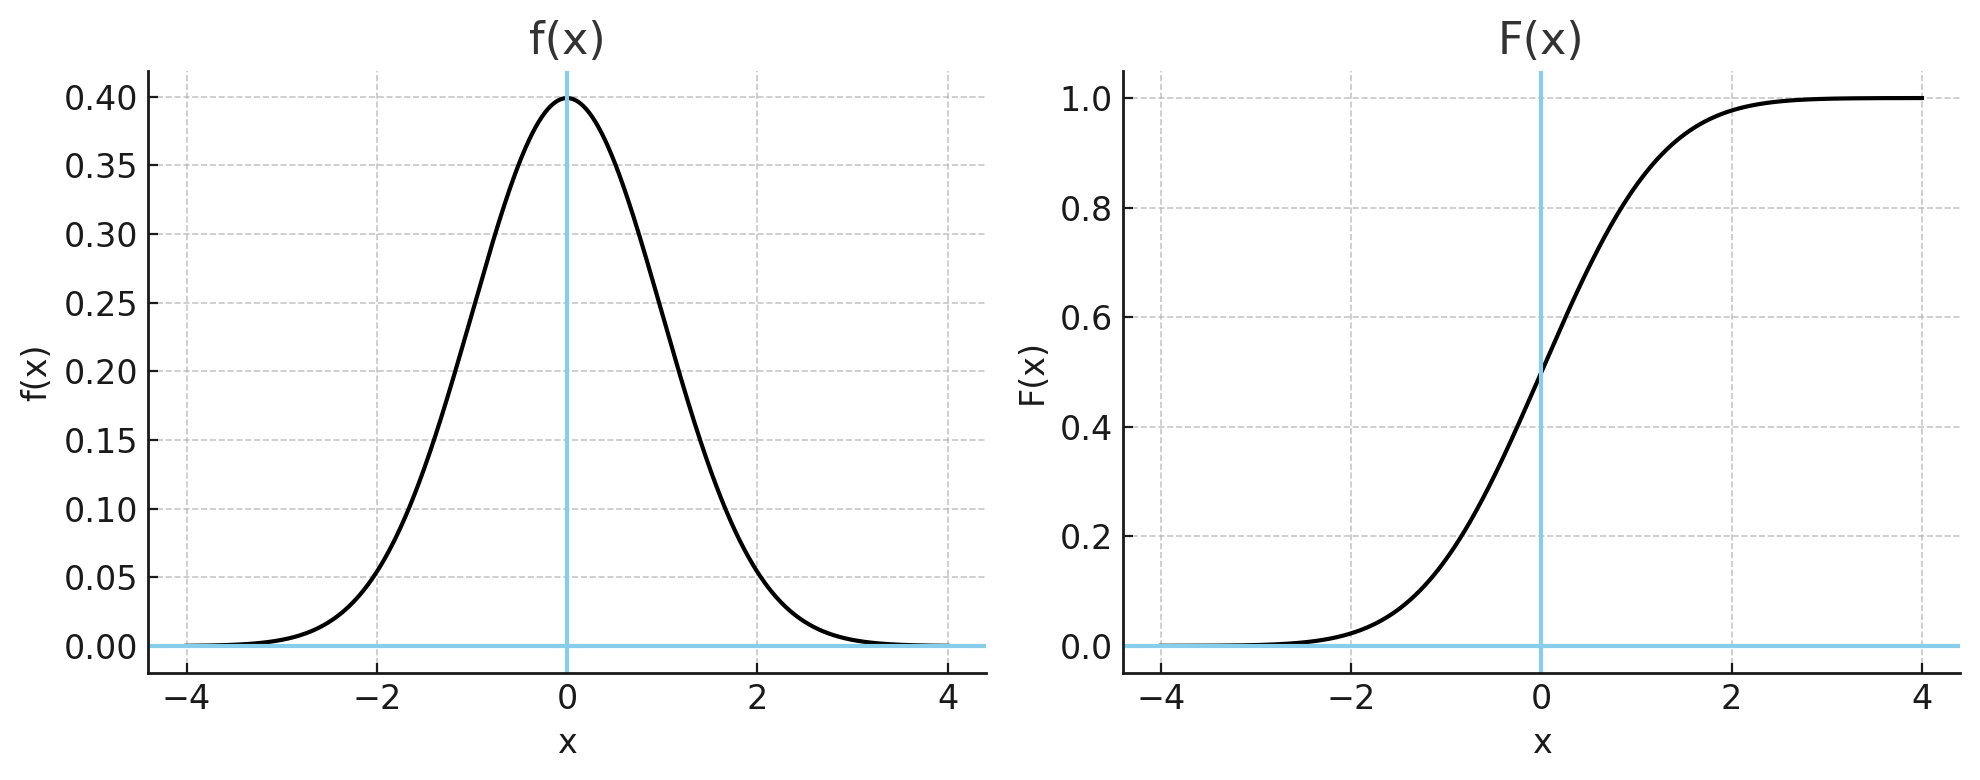

Como se sabe, los valores de $F(x)$ están en el intervalo $(0,1)$ al igual que los números rectangulares $U$. 

El método genera un $U$ y trata de determinar el valor de la variable aleatoria para la cual $F(x)$ sea igual a $U$.

Si $U \in (0,1)$:
$$ F(x) = U \quad \Rightarrow \quad x = F^{-1}(U)$$

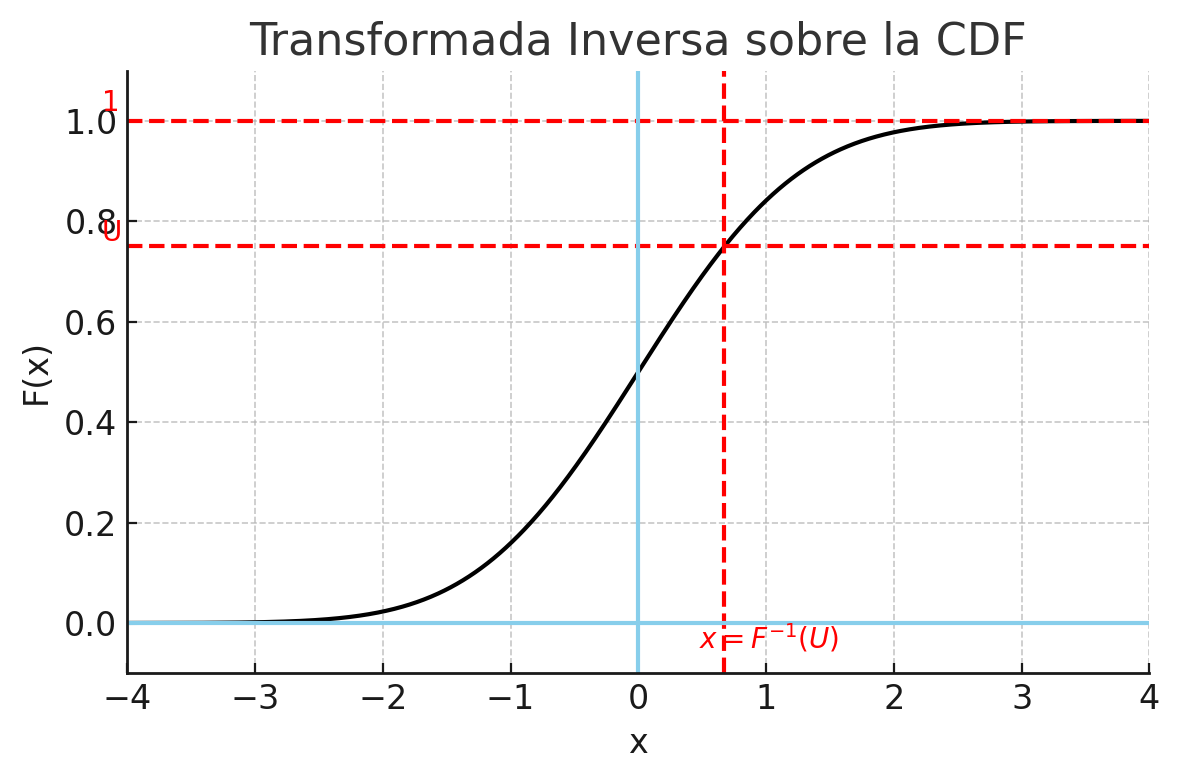

$\mathbf{Teorema}.$ Sea $X$ una variable aleatoria real. Supongamos que su función de distribución $F$ es estrictamente creciente (por lo que $F$ es una biyección de $\mathbb{R}$ sobre $(0,1)$ y podemos denotar por $F^{-1}$ a su inversa). Sea $U\sim \text{unif}[0,1]$. Entonces $F^{-1}(U)$ tiene la misma ley que $X$.

Si $F$ no es estrictamente creciente, hemos visto que el teorema precedente sigue siendo válido bajo la condición de definir 
$$F^{-1}(u)=\inf\{ x\in \mathbb{R} : F(x)\geq u\},$$
la inversa generalizada de $F$.

In [5]:
''' 
Vamos a simular una variable aleatoria Bernoulli usando una uniforme
'''
import random

In [6]:
def bernoulli(p):
    U = random.random() # U --> Unif(0,1)
    if U <= p:
        return 1
    else:
        return 0

In [7]:
# Simulamos n valores con p de éxito
p = 0.5

simulaciones = [bernoulli(p) for _ in range(100)]

print(simulaciones)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]


In [8]:
sum(simulaciones)

58

In [10]:
#!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 6.4 MB/s eta 0:00:0000:0100:01


In [ ]:
import plotly.express as px # para visualización interactiva

In [12]:
px.histogram(
    simulaciones,
    x = simulaciones,
    nbins = 2,
    title = f'Simulaciones de una v.a Bernoulli con p={p:.2f}',
    labels = {'x':'Valor de la v.a Bernoulli (0 es fracaso, 1 es éxito)'}
)

## Ejemplo: Distribución exponencial

Sea $\theta,\lambda>0$, entonces a través del teorema se puede generar una v.a. exponencial.

Sea $U \sim Unif[0,1]$, entonces si $X\sim Exp(\lambda)$, entonces

$$f_{X}(x) = \lambda e^{-\lambda x}$$ 
y que 
$$ F_X(x) = 1-e^{-\lambda x} $$

Sabemos que $1-e^{-\lambda x} = U$, entonces $1-U = e^{-\lambda x}$, y tomando logaritmo, se tiene que 
$ \ln(1-U) = -\lambda x$ y como $U$ es uniforme entonces $U \sim 1-U$, por lo que depejando a $x$, se tiene que 
$$ X = -\frac{\ln(U)}{\lambda} \sim Exp(\lambda) $$


In [13]:
import numpy as np 
import plotly.graph_objects as go

In [15]:
# Semilla 
np.random.seed(123)

# Parametro exponencial
lambd = 4

# Simulamos 10,000 valores
n = 10000

uniformes = np.random.random(n) # Generamos n valores uniformes
exponenciales = -np.log(uniformes) / lambd


In [16]:
# Vamos a crear la curva de la densidad teórica, es decir f_X(x) = λe^(-λx)
x_vals = np.linspace(0,exponenciales.max(),300)
y_vals = lambd*np.exp(-lambd * x_vals)

In [19]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=exponenciales,
    nbinsx=40,
    histnorm='probability density',
    marker_color='skyblue',
    name='Simulación'
))

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad teórica',
    line=dict(color='darkblue')
))

fig.update_layout(
    title=f'Distribución Exponencial simulada vs teórica (λ = {lambd:.2f})',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()

## Ejemplo: Distribución Uniforme Continua
$$f(x) = \frac{1}{b-a}, \quad a \leq x \leq b$$
$$F(x) = \frac{x-a}{b-a} = U \Rightarrow X = a + (b-a)U \sim Unif(a,b)$$

In [20]:
# Parametros de la continua
a = 2
b = 5
n = 10000 # Número de simulaciones 

uniforme = np.random.random(n) # Generamos n valores uniformes
uniforme_continua = a + (b - a) * uniformes # Transformada inversa

In [21]:
# Hacemos la densida teorica
x_vals = np.linspace(a,b,300)
y_vals = np.ones_like(x_vals) / (b-a) # Densidad 

In [23]:
# Gráfico
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=uniforme_continua,
    nbinsx=40,
    histnorm='probability density',
    marker_color='orange',
    name='Simulación'
))
fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad teórica',
    line=dict(color='red')
))
fig.update_layout(
    title=f'Distribución Uniforme Continua simulada vs teórica [{a:.1f}, {b:.1f}]',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)
fig.show()

$\mathbf{Ejemplo}$ (Variable aleatoria Cauchy) Simulemos la variable aleatoria de Cauchy de parámetro $1$ que tiene por función de densidad 
$$f_X(x)=\frac{1}{\pi}\frac{1}{1+x^{2}}, \ x\in \mathbb{R}$$



**Ejercicio:** 
- Corroborar que la función así definida es una función de densidad de probabilidad
- Encontrar $F_X$
- Crear una gráfica en Python que muestre su forma
- Generar v.a. Cauchy a partir de una uniforme

Por el teorema anterior, para $u\in (0,1)$
$$u=\frac{1}{\pi}\arctan(x)+\frac{1}{2} \qquad \text{si y sólo si} \qquad x=\tan\left({\pi}\left(u-\frac{1}{2} \right) \right).$$

**Primer inciso**

$$ \int_{-\infty}^{\infty}\frac{1}{\pi}\frac{1}{1+x^2}dx = \frac{1}{\pi} \int_{-\infty}^{\infty}\frac{1}{1+x^2}dx = \frac{1}{\pi} \left(\arctan(x) \Big|_{-\infty}^{\infty} \right) = \frac{1}{\pi}\left( \frac{\pi}{2}- \left( -\frac{\pi}{2} \right) \right) = \frac{1}{\pi}(\pi) = 1 $$

Por lo tanto sí es una función de densidad de probabilidad.

**Segundo inciso**
$$\begin{align*}F_X(x)&= \int_{-\infty}^{x}\frac{1}{\pi}\frac{1}{1+u^2}du = \frac{1}{\pi} \int_{-\infty}^{x}\frac{1}{1+u^2}du = \frac{1}{\pi} \left(\arctan(u) \Big|_{-\infty}^{x} \right)\\ &= \frac{1}{\pi} \left( \arctan(x) - \left( -\frac{\pi}{2}  \right)  \right)= \frac{\arctan(x)}{\pi} + \frac{1}{2} \end{align*}$$ 

Obtuvimos $$F_X(x) = \frac{1}{\pi}\arctan(x) + \frac{1}{2} $$

**Tercer inciso**

In [24]:
import numpy as np 
import matplotlib.pyplot as plt

In [26]:
# definimos F_X
def fx(x):
    return (1/np.pi)*np.arctan(x) + (1/2)

# Generamos los puntos
x_valores = np.linspace(-100,100,400)
y_valores = fx(x_valores)

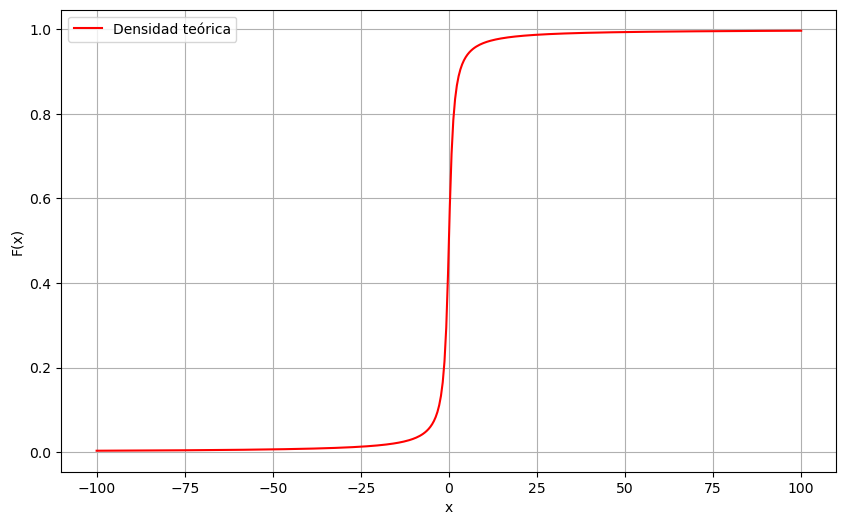

In [30]:
# Graficamos 

plt.figure(figsize=(10,6))

plt.plot(x_valores,y_valores,c='r',label='Densidad teórica')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()

plt.show()

**Cuarto inciso**

Si $U = F_X(x) = \frac{1}{\pi}\arctan(x) + \frac{1}{2} $, despejando obtenemos $X = \tan\left(\pi \left( u - \frac{1}{2}  \right)  \right)$

In [53]:
n = 1000 # Número de simulaciones 

uniforme = np.random.random(n) # Generamos n valores uniformes
cauchy = np.tan(np.pi * (uniforme - (1/2)))

In [44]:
# Hacemos la densida teorica
x_vals = np.linspace(-100,100,400)
y_vals = fx(x_valores)

In [55]:
# Gráfico
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=cauchy,
    nbinsx=1000,
    histnorm='probability density',
    marker_color='orange',
    name='Simulación'
))
fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad teórica',
    line=dict(color='red')
))
fig.update_layout(
    title=f'Distribución Cauchy simulada vs teórica',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)
fig.show()